In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense,LSTM,Activation
from keras.utils import to_categorical
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn import preprocessing

Using TensorFlow backend.


In [2]:
TIME_STEP =10
INPUT_SIZE = 1
OUTPUT_SIZE = 1
BATCH_SIZE = 32
HIDDEN_UNITS = 128

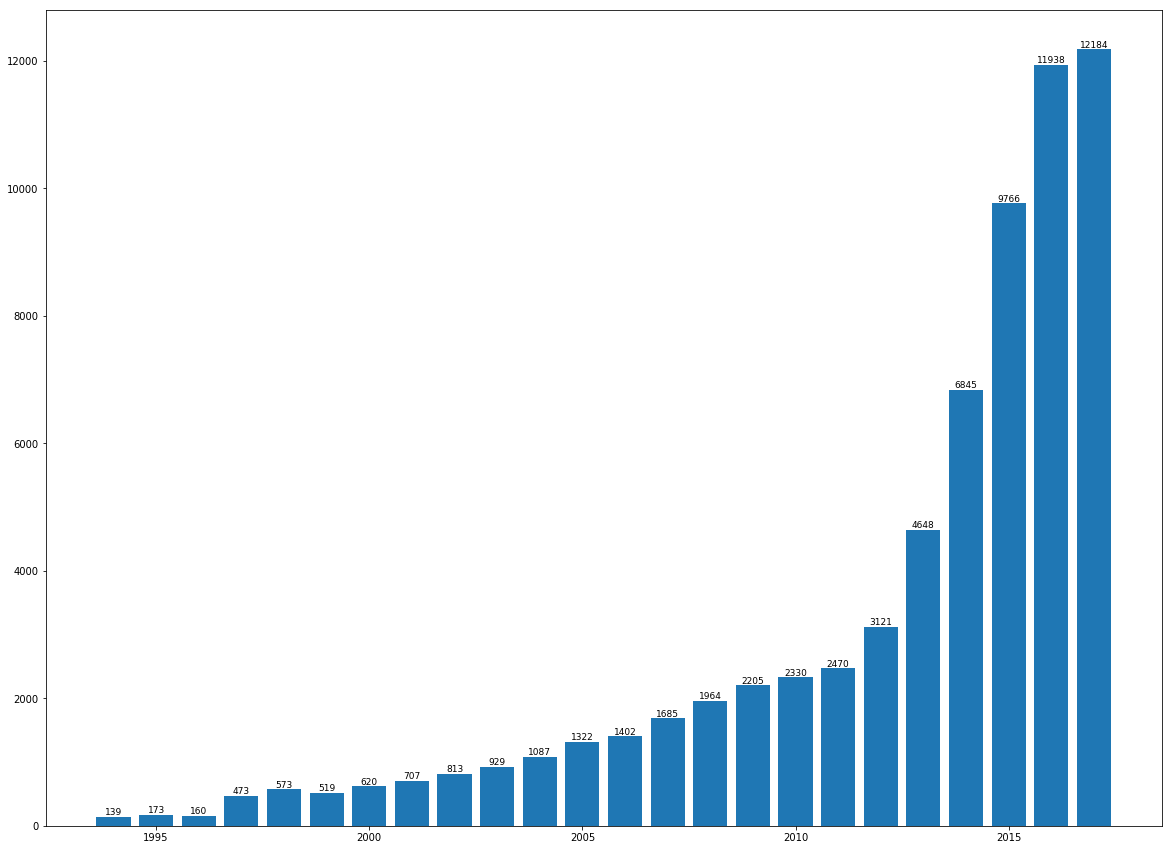

In [3]:
train_data = np.array([139,173,160,473,573,519,620,707,813,929,1087,1322,1402,1685,1964,2205,2330,2470,3121,4648,6845,9766,11938,12184],dtype=np.float32)
x = np.arange(1994,2018,1)
plt.figure(figsize=(20,15))
plt.bar(x,train_data)
for a,b in zip(x,train_data):
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom',fontsize=9)
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
data_scaler = MinMaxScaler()
train_data = data_scaler.fit_transform(train_data.reshape(-1,1))

In [5]:
train_data = train_data.squeeze()

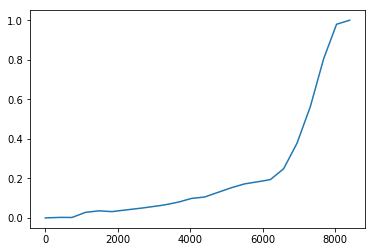

In [6]:
delta_x = 365
train_x= []
for i in range(len(train_data)-1):
    delta_y = train_data[i+1]-train_data[i]
    k = float(delta_y/delta_x)
    for j in range(delta_x):
        cal_y = train_data[i]+j*k
        train_x.append(cal_y)


plt.plot(train_x)
plt.show()

In [10]:
train_x[365],train_x[366]

(0.0028227483853697777, 0.0028197914361953735)

In [149]:
len(train_x)

8395

In [15]:
[train_x[365*i] for i in range(22)]

[0.0,
 0.0028227483853697777,
 0.001743461936712265,
 0.027729347348213196,
 0.03603154793381691,
 0.031548358500003815,
 0.03993358090519905,
 0.047156497836112976,
 0.05595682933926582,
 0.06558738648891449,
 0.07870486378669739,
 0.0982150286436081,
 0.10485678911209106,
 0.12835201621055603,
 0.1515151560306549,
 0.17152345180511475,
 0.18190120160579681,
 0.1935242861509323,
 0.24757161736488342,
 0.37434619665145874,
 0.5567455291748047,
 0.7992528080940247]

In [16]:
inputs = []
labels = []
for i in range(len(train_x)-TIME_STEP):   
    inputs.append(train_x[i:i+TIME_STEP])
    labels.append(train_x[i+TIME_STEP])

In [17]:
inputs = np.array(inputs).reshape(-1,TIME_STEP,INPUT_SIZE)
labels = np.array(labels).reshape(-1,OUTPUT_SIZE)

In [18]:
inputs.shape,labels.shape

((8385, 10, 1), (8385, 1))

In [34]:
[labels[i*365-10] for i in range(1,22)]

[array([0.00282275]),
 array([0.00174346]),
 array([0.02772935]),
 array([0.03603155]),
 array([0.03154836]),
 array([0.03993358]),
 array([0.0471565]),
 array([0.05595683]),
 array([0.06558739]),
 array([0.07870486]),
 array([0.09821503]),
 array([0.10485679]),
 array([0.12835202]),
 array([0.15151516]),
 array([0.17152345]),
 array([0.1819012]),
 array([0.19352429]),
 array([0.24757162]),
 array([0.3743462]),
 array([0.55674553]),
 array([0.79925281])]

In [35]:
model = Sequential()
model.add(LSTM(HIDDEN_UNITS, input_shape=(TIME_STEP, INPUT_SIZE)))
model.add(Dense(OUTPUT_SIZE, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')

In [36]:
model.fit(inputs, labels, batch_size=BATCH_SIZE,epochs=10)

Epoch 1/10
8385/8385 [==============================] - 9s 1ms/step - loss: 0.0110
Epoch 2/10
8385/8385 [==============================] - 5s 636us/step - loss: 6.7309e-04
Epoch 3/10
8385/8385 [==============================] - 5s 652us/step - loss: 8.6619e-05
Epoch 4/10
8385/8385 [==============================] - 6s 664us/step - loss: 6.7996e-05
Epoch 5/10
8385/8385 [==============================] - 6s 693us/step - loss: 6.2858e-05 0s - loss: 6.33
Epoch 6/10
8385/8385 [==============================] - 6s 668us/step - loss: 4.8669e-05
Epoch 7/10
8385/8385 [==============================] - 5s 628us/step - loss: 3.6291e-05 0s - loss: 3.6335e-
Epoch 8/10
8385/8385 [==============================] - 5s 619us/step - loss: 1.6440e-05 3s - los  - E
Epoch 9/10
8385/8385 [==============================] - 5s 617us/step - loss: 1.4840e-05
Epoch 10/10
8385/8385 [==============================] - 5s 629us/step - loss: 1.2100e-05


In [37]:
predict = model.predict(x=inputs.reshape(-1,TIME_STEP,OUTPUT_SIZE))

In [60]:
predict

array([[0.0078821 ],
       [0.00788633],
       [0.00789054],
       ...,
       [0.991235  ],
       [0.99125004],
       [0.9912649 ]], dtype=float32)

In [61]:
labels

array([[7.73355722e-05],
       [8.50691294e-05],
       [9.28026866e-05],
       ...,
       [9.99832136e-01],
       [9.99888091e-01],
       [9.99944045e-01]])

In [83]:
label_year = np.array([labels[i*365-10] for i in range(1,23)])*12045+139

In [91]:
predict_year = np.array([predict[i*365-10] for i in range(1,23)])*12045+139

In [119]:
predict_year.shape

(22, 1)

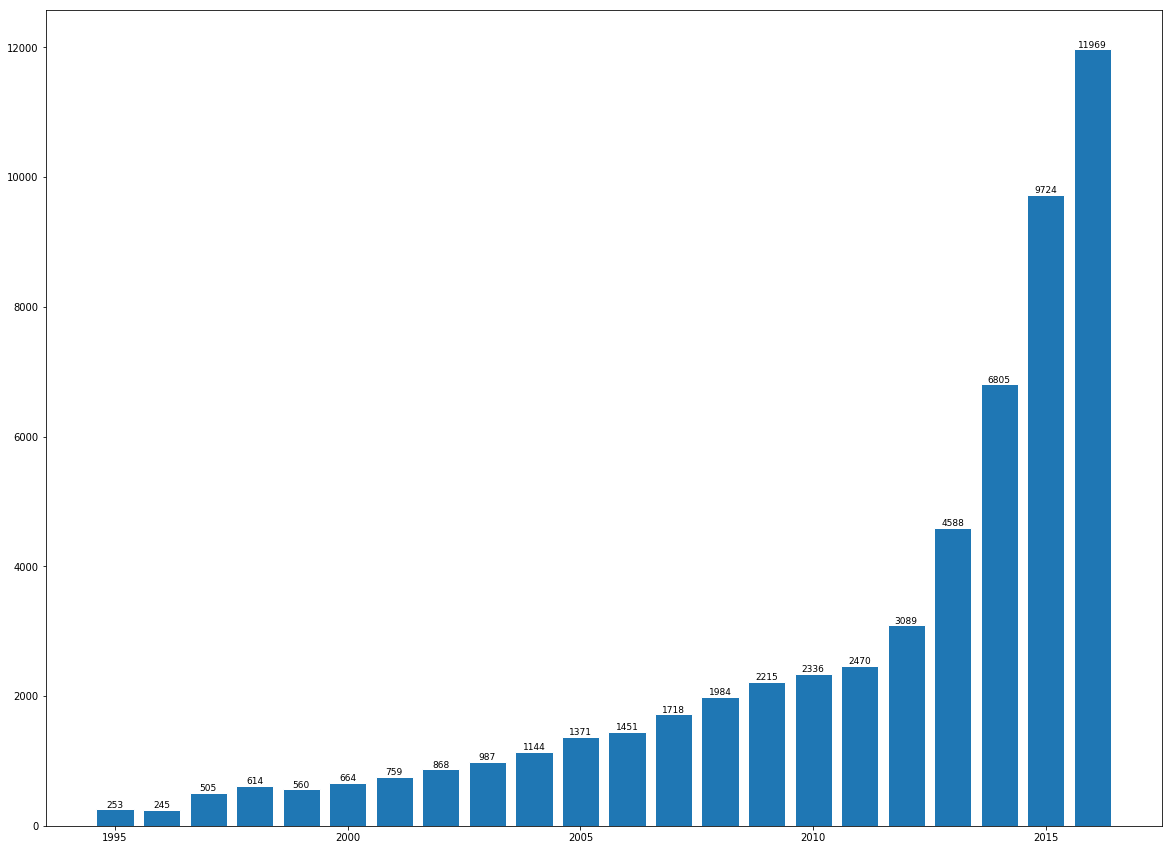

In [125]:
plt.figure(figsize=(20,15))
plt.bar(x,predict_year.squeeze(),width = 0.8,edgecolor = 'white')
for a,b in zip(x,predict_year.squeeze()):
    plt.text(a, b, '%d' % b, ha='center', va= 'bottom',fontsize=9)
plt.show()

In [95]:
delta_year = label_year.astype(np.int32)-predict_year.astype(np.int32)

In [117]:
delta_year.shape

(22, 1)

In [97]:
delta_year.squeeze()/label_year.squeeze()

array([-0.46242773, -0.5375    , -0.06976744, -0.07329843, -0.08092486,
       -0.07258065, -0.07355021, -0.06765068, -0.06243272, -0.0524379 ,
       -0.03706505, -0.03495007, -0.01958457, -0.0101833 , -0.00498866,
       -0.00300429,  0.        ,  0.01025312,  0.01269363,  0.00569759,
        0.00430063, -0.00268052])

In [98]:
len(delta_year)

22

In [114]:
x = np.arange(1995,2017,1)
y = np.abs(delta_year.squeeze()/label_year.squeeze())

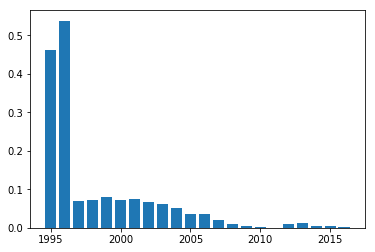

In [115]:
plt.bar(x,y,width = 0.8)
plt.show()

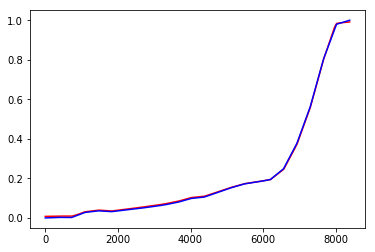

In [102]:
import matplotlib.pyplot as plt
plt.plot(predict,'r',labels,'b')
plt.show()

In [41]:
pre_2017 = model.predict(x=np.array([0.99944043, 0.9994964 , 0.99955237, 0.99960834, 0.99966425,
       0.9997202 , 0.9997762 , 0.99983215, 0.99988806, 0.99994403]).reshape(-1,TIME_STEP,OUTPUT_SIZE))

In [141]:
pre_2017

array(12078)

In [140]:
pre_2017 = (pre_2017*(12045)+139).astype(np.int32).squeeze()

In [99]:
np.array(predict[[365*i for i in range(22)]])

array([[0.00564199],
       [0.00683908],
       [0.00641126],
       [0.02865782],
       [0.03779741],
       [0.03302992],
       [0.04182204],
       [0.04885229],
       [0.05769108],
       [0.06787793],
       [0.08178279],
       [0.10142341],
       [0.10805158],
       [0.1304892 ],
       [0.15325643],
       [0.17302142],
       [0.18330392],
       [0.19515985],
       [0.24987656],
       [0.379623  ],
       [0.5616315 ],
       [0.7985451 ]], dtype=float32)

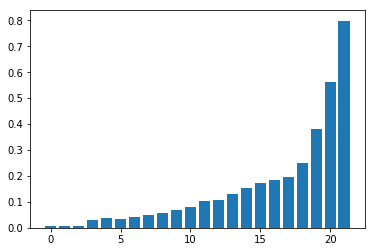

In [102]:
plt.bar(np.arange(22),np.array(predict[[365*i for i in range(22)]]).squeeze())
plt.show()

In [131]:
x.shape

(22,)

In [133]:
predict_year.shape,label_year.shape

((22, 1), (22, 1))

In [139]:
x

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

No handles with labels found to put in legend.


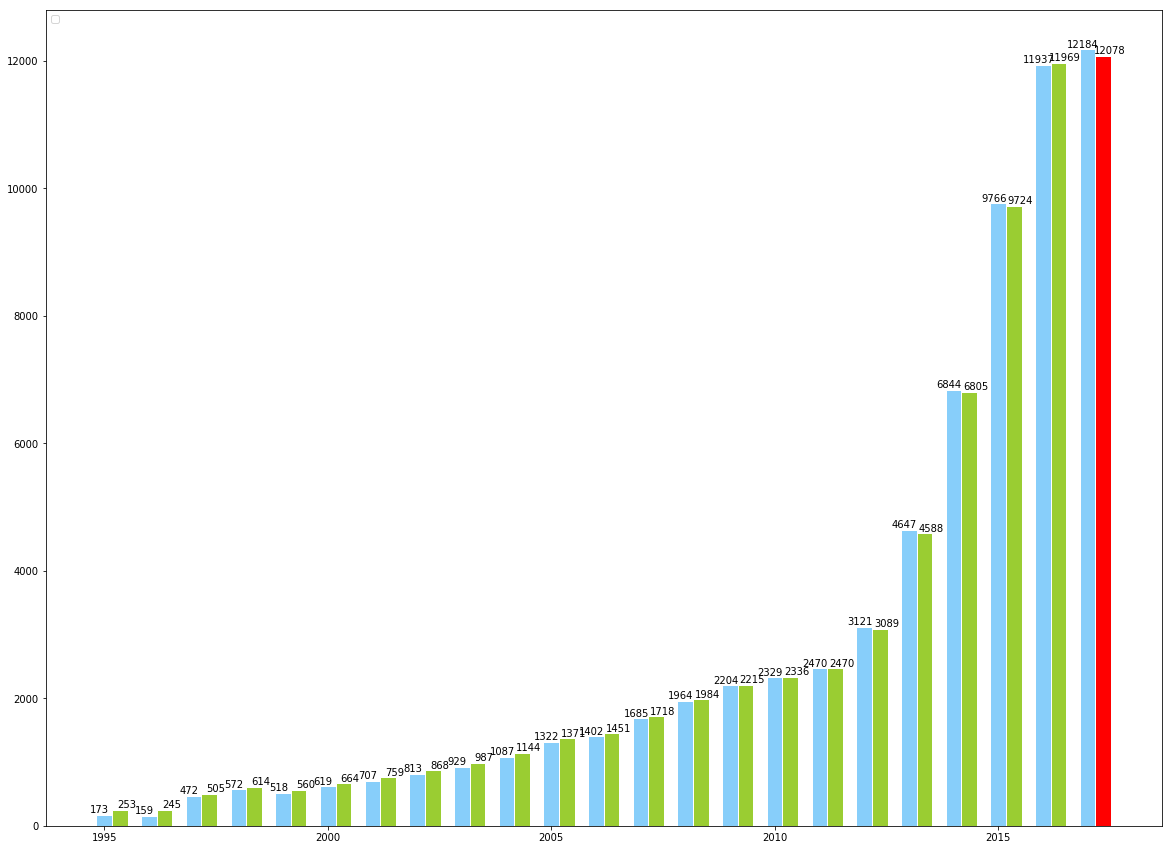

In [148]:
plt.figure(figsize=(20,15))
plt.bar(x,label_year.squeeze(),width = 0.35,facecolor = 'lightskyblue',edgecolor = 'white')
plt.bar(x+0.35,predict_year.squeeze(),width = 0.35,facecolor = 'yellowgreen',edgecolor = 'white')
plt.bar(2017,12184,width = 0.35,facecolor = 'lightskyblue',edgecolor = 'white')
plt.bar(2017+0.35,pre_2017,width = 0.35,facecolor = 'red',edgecolor = 'white')
for X,y in zip(x,label_year.squeeze()):
    plt.text(X-0.1, y+0.05, '%d' % y, ha='center', va= 'bottom')
    
for X,y in zip(x,predict_year.squeeze()):
    plt.text(X+0.5, y+0.05, '%d' % y, ha='center', va= 'bottom')
plt.text(2017-0.1,12184+0.05,'%d' % 12184, ha='center', va= 'bottom')
plt.text(2017+0.5, pre_2017+0.05, '%d' % pre_2017, ha='center', va= 'bottom')
plt.legend(loc="upper left")
plt.show()

In [26]:
predict = model.predict(inputs[-2].reshape(-1,TIME_STEP,OUTPUT_SIZE))

In [20]:
predict = model.predict(np.array(train_x[-10:]).reshape(-1,TIME_STEP,OUTPUT_SIZE))

In [27]:
predict

array([[0.9728055]], dtype=float32)

In [23]:
(12184-11938)/365

0.673972602739726